# Lesson1_DataLoaderでの演習問題の解答例コードです
### あくまで解答例です、タスクさえできりゃあとは良しなのです

In [2]:
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = None # サイズ読み込みエラー対策のおまじない
import torch.utils.data # Datasetクラスを継承するのに使用
import torchvision.transforms as transforms # 画像の前処理に使用

### 演習問題1
#### Q1. train_loaderにてbatch_sizeの値を変えるとどうなるか調べよう
#### Q2. Datasetクラスの*＿＿getitem＿＿()*にて、変更を加えindexも返すようにしよう
#### Q3. Q2ができたら、DataLoaderインスタンスtrain_loader, val_loaderを作成し、イテレーターで"img","name","index"を表示させてみよう

In [2]:
class AntBee_Dataset(torch.utils.data.Dataset):
    def __init__(self, mode):
        super(torch.utils.data.Dataset, self).__init__()
        # Initialize setting
        self.mode = mode
        self.src_root = 'hymenoptera_data'
        self.transform = self._transform()
        # Get img paths and set label
        self.img_paths_list = []
        self.label_list = []
        self.label_dic = {}
        src_dir = os.path.join(self.src_root, mode)
        dir_list = os.listdir(src_dir)
        for idx,dir in enumerate(dir_list):
            # Resister label
            self.label_dic[idx] = dir # {0:ants, 1:bees}となるように代入
            # Get img paths
            img_list = os.listdir(os.path.join(src_dir, dir))
            for img_name in img_list:
                img_path = os.path.join(src_dir, dir, img_name)
                self.img_paths_list.append(img_path)
                self.label_list.append(idx)
                
    def __len__(self): # ! Datasetをつくるにあたって必要 !
        return len(self.label_list)
    
    def __getitem__(self, index): # ! Dataloaderで読みだすのに必要 !
        # Read img path & label
        img_path = self.img_paths_list[index]
        label = self.label_list[index]
        # Load img and proceed
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        #----------------------- Q2の解答例コード --------------------------------------
        return {'img':img, 'label':label, 'name':self.label_dic[label], 'index':index}
        #------------------------------------------------------------------------------
        
    def _transform(self): # 画像データの前処理に
        transform = transforms.Compose([
            transforms.Resize((224, 224), Image.BICUBIC),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        ])
        return transform
    
train_dataset = AntBee_Dataset(mode='train')
val_dataset = AntBee_Dataset(mode='val')

In [4]:
#----------------------- Q1の解答例コード --------------------------------------
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=1, shuffle=True
)
train_data = iter(train_loader).next()
print('With BatchSize=1 version')
print(train_data)
#------------------------------------------------------------------------------

With BatchSize=1 version
{'img': tensor([[[[-0.1294, -0.1294, -0.1294,  ..., -0.0824, -0.0745, -0.0667],
          [-0.2157, -0.2000, -0.2078,  ..., -0.0667, -0.0667, -0.0667],
          [-0.3020, -0.2941, -0.2941,  ..., -0.0510, -0.0431, -0.0510],
          ...,
          [ 0.4667,  0.5765,  0.5059,  ...,  0.3804,  0.3961,  0.4196],
          [ 0.5843,  0.5608,  0.5059,  ...,  0.3804,  0.3961,  0.4196],
          [ 0.5686,  0.5373,  0.4980,  ...,  0.3804,  0.3961,  0.4196]],

         [[-0.3882, -0.3882, -0.3882,  ..., -0.0980, -0.1059, -0.0902],
          [-0.4510, -0.4431, -0.4431,  ..., -0.0902, -0.0902, -0.0902],
          [-0.5294, -0.5137, -0.5137,  ..., -0.0745, -0.0667, -0.0745],
          ...,
          [-0.0275,  0.0353, -0.0431,  ...,  0.3176,  0.3647,  0.3961],
          [ 0.0667,  0.0196, -0.0510,  ...,  0.3176,  0.3647,  0.3961],
          [ 0.0275, -0.0039, -0.0510,  ...,  0.3098,  0.3647,  0.3961]],

         [[-0.9765, -0.9843, -0.9765,  ..., -0.7490, -0.7412, -0.7176

In [5]:
#----------------------- Q3の解答例コード --------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=3, shuffle=True)
train_data = iter(train_loader).next()
print('Pick up from Train Loader')
print(train_data)

val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=3, shuffle=False) # <- Validation(評価)用はshuffleさせないのもセオリー
val_data = iter(val_loader).next()
print('Pick up from Validation Loader')
print(val_data)
#------------------------------------------------------------------------------

Pick up from Train Loader
{'img': tensor([[[[ 0.3020,  0.2706,  0.2941,  ...,  0.3490,  0.3569,  0.3804],
          [ 0.3020,  0.2235,  0.3725,  ...,  0.3490,  0.3725,  0.4039],
          [ 0.2863,  0.2000,  0.3176,  ...,  0.3412,  0.4275,  0.2863],
          ...,
          [ 0.1216,  0.2392,  0.1843,  ...,  0.1294,  0.1451,  0.1294],
          [ 0.1451,  0.2000,  0.0275,  ...,  0.1686, -0.0039,  0.1137],
          [ 0.1686,  0.2157,  0.0588,  ...,  0.2078,  0.0588,  0.1216]],

         [[ 0.0902,  0.0510,  0.0745,  ...,  0.1843,  0.2000,  0.2471],
          [ 0.1059,  0.0275,  0.1765,  ...,  0.1922,  0.2235,  0.2549],
          [ 0.0980,  0.0196,  0.1373,  ...,  0.1843,  0.2706,  0.1137],
          ...,
          [-0.0353,  0.0824,  0.0196,  ..., -0.0667, -0.0745, -0.0902],
          [-0.0275,  0.0118, -0.1451,  ..., -0.0353, -0.2078, -0.0980],
          [-0.0196,  0.0275, -0.1294,  ...,  0.0039, -0.1529, -0.0902]],

         [[-0.2314, -0.2627, -0.2471,  ..., -0.1373, -0.1216, -0.082

### 演習問題2
#### Q1. train_loader, val_loaderにそれぞれあるイテレーターをすべて読み出してみよう
#### Q2. 上記のコードに修正を加えて、データを読み出すのを10epoch行おう
#### ※演習問題1にあるDatasetクラスを引き続き使います

In [9]:
#----------------------- Q1の解答例コード --------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=3, shuffle=True)
print('Load 1 epoch data from Train')
for idx, data in enumerate(train_loader):
    print('\t iter:{}'.format(idx))
    print('\t\t {}'.format(data))
    
val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=3, shuffle=False)
print('Load 1 epoch data from Validation')
for idx, data in enumerate(val_loader):
    print('\t iter:{}'.format(idx))
    print('\t\t {}'.format(data))
#------------------------------------------------------------------------------

Load 1 epoch data from Train
	 iter:0
		 {'img': tensor([[[[-0.3412, -0.2549, -0.1843,  ...,  0.2471,  0.2000,  0.1451],
          [-0.3882, -0.2706, -0.1843,  ...,  0.4353,  0.3961,  0.2471],
          [-0.4431, -0.2863, -0.1451,  ...,  0.4902,  0.4431,  0.3647],
          ...,
          [-0.5922, -0.4588, -0.4745,  ...,  0.2863,  0.2392,  0.1686],
          [-0.4275, -0.3882, -0.4745,  ...,  0.3961,  0.2941,  0.2784],
          [-0.5373, -0.6078, -0.5137,  ...,  0.2471,  0.1765,  0.1843]],

         [[-0.3569, -0.3020, -0.2784,  ...,  0.0353, -0.0353, -0.0588],
          [-0.4118, -0.3255, -0.2863,  ...,  0.1922,  0.1686,  0.0667],
          [-0.4667, -0.3255, -0.2392,  ...,  0.2549,  0.2627,  0.1843],
          ...,
          [-0.3490, -0.2392, -0.2784,  ...,  0.0667,  0.0667, -0.0196],
          [-0.2471, -0.2000, -0.2627,  ...,  0.2235,  0.1216,  0.1373],
          [-0.2941, -0.3255, -0.3176,  ...,  0.0510, -0.0196, -0.0275]],

         [[-0.7647, -0.7255, -0.6784,  ..., -0.3490, 

	 iter:5
		 {'img': tensor([[[[-0.6549, -0.6314, -0.6314,  ..., -0.3961, -0.2706, -0.2235],
          [-0.6235, -0.6157, -0.6235,  ..., -0.3569, -0.2314, -0.1922],
          [-0.6314, -0.6157, -0.6000,  ..., -0.2706, -0.1843, -0.1686],
          ...,
          [-0.5294, -0.5765, -0.5922,  ..., -0.2784, -0.3020, -0.3333],
          [-0.4980, -0.5059, -0.5608,  ..., -0.2941, -0.3490, -0.3725],
          [-0.4510, -0.4510, -0.5059,  ..., -0.3255, -0.3882, -0.3961]],

         [[-0.7020, -0.6863, -0.6706,  ..., -0.4667, -0.3647, -0.3176],
          [-0.6863, -0.6706, -0.6471,  ..., -0.4039, -0.3176, -0.2941],
          [-0.6235, -0.6235, -0.6157,  ..., -0.3412, -0.2863, -0.2706],
          ...,
          [-0.5137, -0.5608, -0.5843,  ...,  0.0745,  0.0510, -0.0039],
          [-0.4824, -0.5059, -0.5373,  ..., -0.0039, -0.0196, -0.0431],
          [-0.4588, -0.4588, -0.4745,  ..., -0.0902, -0.1216, -0.1059]],

         [[-0.6314, -0.6078, -0.6000,  ..., -0.3804, -0.2784, -0.2392],
          

	 iter:11
		 {'img': tensor([[[[-0.3176, -0.3255, -0.3255,  ..., -0.5373, -0.5451, -0.5608],
          [-0.3176, -0.3255, -0.3255,  ..., -0.5451, -0.5608, -0.5686],
          [-0.3176, -0.3255, -0.3255,  ..., -0.5608, -0.5529, -0.5686],
          ...,
          [-0.2157, -0.1922, -0.1922,  ..., -0.3804, -0.5216, -0.6157],
          [-0.2471, -0.2235, -0.2078,  ..., -0.3647, -0.5137, -0.6078],
          [-0.2392, -0.2314, -0.2235,  ..., -0.3569, -0.5059, -0.5922]],

         [[-0.4510, -0.4510, -0.4667,  ..., -0.4588, -0.4588, -0.4667],
          [-0.4510, -0.4510, -0.4510,  ..., -0.4667, -0.4745, -0.4824],
          [-0.4588, -0.4510, -0.4510,  ..., -0.4667, -0.4824, -0.4980],
          ...,
          [-0.3098, -0.3176, -0.3098,  ..., -0.2627, -0.3725, -0.4510],
          [-0.3255, -0.3176, -0.3020,  ..., -0.2627, -0.3804, -0.4510],
          [-0.3333, -0.3255, -0.3098,  ..., -0.2627, -0.3725, -0.4431]],

         [[-0.5765, -0.5686, -0.5765,  ..., -0.8431, -0.8745, -0.8667],
         

	 iter:19
		 {'img': tensor([[[[-0.6784, -0.6706, -0.6784,  ..., -0.8510, -0.8588, -0.8510],
          [-0.7020, -0.6784, -0.6784,  ..., -0.8510, -0.8667, -0.8667],
          [-0.6863, -0.6863, -0.6941,  ..., -0.8431, -0.8588, -0.8588],
          ...,
          [ 0.4902,  0.4588,  0.3412,  ...,  0.3098,  0.3098,  0.3333],
          [ 0.2627,  0.1922,  0.1451,  ...,  0.3333,  0.3569,  0.3725],
          [ 0.0745,  0.0745,  0.1294,  ...,  0.3725,  0.4196,  0.4431]],

         [[-0.6314, -0.6471, -0.6549,  ..., -0.8431, -0.8431, -0.8275],
          [-0.6235, -0.6549, -0.6706,  ..., -0.8275, -0.8353, -0.8275],
          [-0.6627, -0.6706, -0.6706,  ..., -0.8275, -0.8353, -0.8353],
          ...,
          [ 0.6235,  0.5294,  0.3647,  ...,  0.3333,  0.3333,  0.3490],
          [ 0.3020,  0.1765,  0.0980,  ...,  0.3490,  0.3569,  0.3961],
          [ 0.0667,  0.0510,  0.0745,  ...,  0.3647,  0.4039,  0.4431]],

         [[ 0.0980,  0.1608,  0.1451,  ..., -0.6314, -0.6392, -0.6706],
         

	 iter:27
		 {'img': tensor([[[[-0.9137, -0.9137, -0.9451,  ..., -0.7569, -0.7412, -0.7647],
          [-0.9451, -0.9529, -0.9686,  ..., -0.7961, -0.7882, -0.7804],
          [-0.9686, -0.9686, -0.9373,  ..., -0.7725, -0.7961, -0.7647],
          ...,
          [ 0.0510, -0.0039,  0.0039,  ...,  0.6157,  0.6078,  0.6549],
          [ 0.0510,  0.0667,  0.0588,  ...,  0.6471,  0.6000,  0.6000],
          [ 0.0510,  0.0667,  0.0588,  ...,  0.6314,  0.6314,  0.6392]],

         [[-0.8196, -0.8196, -0.8353,  ..., -0.7569, -0.7490, -0.7569],
          [-0.8588, -0.8745, -0.8902,  ..., -0.7804, -0.7804, -0.7647],
          [-0.9059, -0.9137, -0.8824,  ..., -0.7725, -0.8039, -0.7961],
          ...,
          [ 0.1608,  0.0902,  0.1216,  ...,  0.7882,  0.7882,  0.8353],
          [ 0.1765,  0.1843,  0.1843,  ...,  0.8118,  0.7961,  0.8275],
          [ 0.1294,  0.1608,  0.1451,  ...,  0.8039,  0.8196,  0.8275]],

         [[-0.9059, -0.8980, -0.9216,  ..., -0.9137, -0.8824, -0.8745],
         

	 iter:34
		 {'img': tensor([[[[-0.1216, -0.1137, -0.0745,  ...,  0.7176,  0.7255,  0.7255],
          [-0.1294, -0.0980, -0.1294,  ...,  0.7176,  0.7176,  0.7176],
          [-0.1294, -0.1373, -0.2078,  ...,  0.7098,  0.7176,  0.7176],
          ...,
          [ 0.2235,  0.2157,  0.2314,  ..., -0.3569, -0.4196, -0.4588],
          [ 0.2000,  0.2000,  0.2157,  ..., -0.3882, -0.4745, -0.5137],
          [ 0.1843,  0.1843,  0.1686,  ..., -0.4431, -0.4980, -0.5529]],

         [[ 0.2314,  0.2392,  0.2235,  ...,  0.8196,  0.8275,  0.8275],
          [ 0.2314,  0.2549,  0.2235,  ...,  0.8196,  0.8196,  0.8196],
          [ 0.2471,  0.2235,  0.2078,  ...,  0.8118,  0.8196,  0.8196],
          ...,
          [ 0.3647,  0.3569,  0.3647,  ..., -0.0510, -0.0980, -0.1608],
          [ 0.3255,  0.3333,  0.3569,  ..., -0.0745, -0.1373, -0.2000],
          [ 0.3098,  0.3098,  0.3098,  ..., -0.1294, -0.1765, -0.2392]],

         [[-0.9765, -0.9686, -0.9765,  ...,  0.7412,  0.7490,  0.7490],
         

	 iter:41
		 {'img': tensor([[[[-0.8196, -0.8196, -0.8196,  ..., -0.8196, -0.8196, -0.8039],
          [-0.8196, -0.8196, -0.8196,  ..., -0.8118, -0.8275, -0.8196],
          [-0.8196, -0.8275, -0.8275,  ..., -0.8118, -0.8196, -0.8039],
          ...,
          [ 0.9294,  0.9294,  0.9216,  ...,  0.7098,  0.7098,  0.7020],
          [ 0.9294,  0.9294,  0.9216,  ...,  0.7020,  0.7098,  0.6941],
          [ 0.9294,  0.9294,  0.9294,  ...,  0.7098,  0.7020,  0.6941]],

         [[-0.7020, -0.7098, -0.7255,  ..., -0.7020, -0.6941, -0.6863],
          [-0.7098, -0.7176, -0.7255,  ..., -0.6941, -0.6863, -0.6706],
          [-0.7098, -0.7176, -0.7255,  ..., -0.6863, -0.6784, -0.6627],
          ...,
          [ 0.9216,  0.9216,  0.9137,  ...,  0.6235,  0.6157,  0.6157],
          [ 0.9216,  0.9216,  0.9137,  ...,  0.6157,  0.6157,  0.6157],
          [ 0.9216,  0.9216,  0.9216,  ...,  0.6000,  0.6157,  0.6235]],

         [[-0.9059, -0.9059, -0.8980,  ..., -0.8667, -0.8667, -0.8588],
         

	 iter:48
		 {'img': tensor([[[[ 0.7804,  0.5216,  0.2627,  ..., -0.1529, -0.0745, -0.0431],
          [ 0.7255,  0.6471,  0.3882,  ...,  0.0510,  0.0824,  0.0745],
          [ 0.7725,  0.4588,  0.2941,  ...,  0.2627,  0.3176,  0.3569],
          ...,
          [-0.9529, -0.9373, -0.9529,  ..., -0.4980, -0.3804, -0.3333],
          [-0.9294, -0.9373, -0.9373,  ..., -0.3882, -0.4824, -0.3490],
          [-0.8980, -0.9137, -0.9059,  ..., -0.3333, -0.4039, -0.4118]],

         [[ 0.3961,  0.3804,  0.3176,  ..., -0.4196, -0.3569, -0.3569],
          [ 0.2941,  0.4588,  0.3961,  ..., -0.2863, -0.2706, -0.3176],
          [ 0.3725,  0.2471,  0.2549,  ..., -0.1216, -0.0980, -0.1137],
          ...,
          [-0.7882, -0.7804, -0.7961,  ..., -0.6471, -0.5373, -0.4667],
          [-0.7882, -0.7961, -0.7961,  ..., -0.5843, -0.6706, -0.5294],
          [-0.8039, -0.8196, -0.8118,  ..., -0.5216, -0.5843, -0.5922]],

         [[ 0.1608,  0.2941,  0.3725,  ..., -0.4902, -0.4196, -0.4196],
         

	 iter:55
		 {'img': tensor([[[[ 0.7647,  0.7647,  0.7569,  ...,  0.7882,  0.7961,  0.7961],
          [ 0.7647,  0.7647,  0.7647,  ...,  0.7882,  0.7961,  0.7961],
          [ 0.7647,  0.7647,  0.7647,  ...,  0.7882,  0.7882,  0.7882],
          ...,
          [ 0.7882,  0.7882,  0.7804,  ...,  0.7569,  0.7569,  0.7490],
          [ 0.7882,  0.7882,  0.7882,  ...,  0.7490,  0.7412,  0.7412],
          [ 0.7882,  0.7882,  0.7961,  ...,  0.7412,  0.7412,  0.7490]],

         [[ 0.7569,  0.7569,  0.7490,  ...,  0.7647,  0.7725,  0.7725],
          [ 0.7569,  0.7569,  0.7569,  ...,  0.7647,  0.7725,  0.7725],
          [ 0.7569,  0.7569,  0.7569,  ...,  0.7647,  0.7647,  0.7647],
          ...,
          [ 0.7882,  0.7882,  0.7804,  ...,  0.7333,  0.7333,  0.7255],
          [ 0.7882,  0.7882,  0.7882,  ...,  0.7333,  0.7333,  0.7333],
          [ 0.7882,  0.7882,  0.7961,  ...,  0.7333,  0.7333,  0.7412]],

         [[ 0.7412,  0.7412,  0.7333,  ...,  0.7098,  0.7176,  0.7176],
         

	 iter:62
		 {'img': tensor([[[[-0.1922, -0.2000, -0.1765,  ..., -0.7961, -0.7961, -0.8196],
          [-0.2000, -0.1843, -0.1765,  ..., -0.8118, -0.8196, -0.8353],
          [-0.1843, -0.1843, -0.1843,  ..., -0.8196, -0.8353, -0.8353],
          ...,
          [-0.6784, -0.6706, -0.6549,  ..., -0.8039, -0.7961, -0.7961],
          [-0.6392, -0.6392, -0.6392,  ..., -0.7961, -0.8039, -0.8039],
          [-0.6314, -0.6392, -0.6235,  ..., -0.8039, -0.8196, -0.8431]],

         [[-0.1529, -0.1451, -0.1529,  ..., -0.8118, -0.8275, -0.8353],
          [-0.1529, -0.1294, -0.1451,  ..., -0.8275, -0.8275, -0.8196],
          [-0.1373, -0.1373, -0.1529,  ..., -0.8196, -0.8431, -0.8275],
          ...,
          [-0.5765, -0.5686, -0.5843,  ..., -0.8118, -0.7961, -0.7882],
          [-0.5529, -0.5529, -0.5608,  ..., -0.8196, -0.8431, -0.8431],
          [-0.5451, -0.5529, -0.5373,  ..., -0.8275, -0.8196, -0.8196]],

         [[-0.4510, -0.4667, -0.4588,  ..., -0.8039, -0.8275, -0.8353],
         

	 iter:69
		 {'img': tensor([[[[-0.2549, -0.2314, -0.3412,  ...,  0.6235,  0.5529,  0.4667],
          [-0.2157, -0.1843, -0.3333,  ...,  0.5843,  0.6941,  0.6549],
          [-0.5686, -0.4824, -0.1608,  ...,  0.4745,  0.6471,  0.6000],
          ...,
          [ 0.4980,  0.7490,  0.7333,  ...,  0.6471,  0.4824,  0.4353],
          [ 0.5059,  0.7255,  0.5373,  ...,  0.4431,  0.4667,  0.5137],
          [ 0.4431,  0.6627,  0.5294,  ...,  0.2784,  0.4980,  0.6471]],

         [[-0.3490, -0.3490, -0.4353,  ...,  0.6000,  0.5216,  0.4196],
          [-0.2863, -0.2706, -0.4275,  ...,  0.5529,  0.6549,  0.6078],
          [-0.6235, -0.5294, -0.2314,  ...,  0.4275,  0.6000,  0.5529],
          ...,
          [ 0.4824,  0.7412,  0.7255,  ...,  0.6706,  0.4588,  0.4118],
          [ 0.4902,  0.7098,  0.5294,  ...,  0.4431,  0.4431,  0.4824],
          [ 0.4275,  0.6706,  0.5373,  ...,  0.2157,  0.4588,  0.6157]],

         [[-0.5294, -0.5294, -0.5373,  ...,  0.4902,  0.3725,  0.2706],
         

	 iter:75
		 {'img': tensor([[[[-0.2941, -0.4745, -0.4118,  ...,  0.0431,  0.0431,  0.0431],
          [-0.3098, -0.4510, -0.4039,  ...,  0.0510,  0.0275,  0.0196],
          [-0.3020, -0.4039, -0.4275,  ...,  0.0353,  0.0275,  0.0118],
          ...,
          [-0.6078, -0.5451, -0.4431,  ..., -0.2235, -0.2314, -0.2157],
          [-0.6392, -0.6314, -0.5059,  ..., -0.2471, -0.2314, -0.2235],
          [-0.6000, -0.5922, -0.5765,  ..., -0.2471, -0.2314, -0.2157]],

         [[-0.3961, -0.5686, -0.4667,  ..., -0.0431, -0.0275, -0.0275],
          [-0.3961, -0.5529, -0.4824,  ..., -0.0196, -0.0196, -0.0275],
          [-0.3882, -0.5137, -0.5137,  ..., -0.0275, -0.0196, -0.0196],
          ...,
          [-0.5294, -0.4588, -0.4039,  ..., -0.0353, -0.0353, -0.0275],
          [-0.5451, -0.5451, -0.4588,  ..., -0.0431, -0.0431, -0.0353],
          [-0.5451, -0.5373, -0.5294,  ..., -0.0353, -0.0431, -0.0275]],

         [[ 0.0118, -0.0980, -0.1216,  ..., -0.0667, -0.0588, -0.0510],
         

	 iter:0
		 {'img': tensor([[[[-0.3647, -0.3647, -0.3569,  ..., -0.3725, -0.3882, -0.3804],
          [-0.3647, -0.3647, -0.3647,  ..., -0.3725, -0.3882, -0.3882],
          [-0.3725, -0.3647, -0.3647,  ..., -0.3647, -0.3961, -0.3882],
          ...,
          [-0.3176, -0.3255, -0.3255,  ..., -0.9922, -0.9686, -0.5451],
          [-0.3176, -0.3255, -0.3333,  ..., -0.9608, -0.9529, -0.5059],
          [-0.3176, -0.3255, -0.3255,  ..., -0.4431, -0.4353, -0.3647]],

         [[ 0.1922,  0.1922,  0.2000,  ...,  0.1686,  0.1686,  0.1765],
          [ 0.1922,  0.1922,  0.1922,  ...,  0.1686,  0.1686,  0.1686],
          [ 0.1843,  0.1922,  0.1922,  ...,  0.1765,  0.1608,  0.1686],
          ...,
          [ 0.2549,  0.2471,  0.2471,  ..., -1.0000, -1.0000, -0.1137],
          [ 0.2549,  0.2471,  0.2392,  ..., -0.9608, -0.9373, -0.1059],
          [ 0.2549,  0.2471,  0.2471,  ...,  0.0118,  0.0196,  0.1686]],

         [[ 0.8353,  0.8353,  0.8431,  ...,  0.8196,  0.8118,  0.8196],
          

	 iter:7
		 {'img': tensor([[[[ 0.1059,  0.0745,  0.0824,  ..., -0.2392, -0.2235, -0.2235],
          [ 0.0667,  0.0353,  0.0980,  ..., -0.2784, -0.1843, -0.2392],
          [ 0.0824,  0.0588,  0.0588,  ..., -0.2627, -0.2157, -0.1922],
          ...,
          [-0.4902, -0.4824, -0.4667,  ..., -0.1373, -0.1059, -0.0667],
          [-0.5373, -0.4824, -0.5137,  ..., -0.1137, -0.1059, -0.0824],
          [-0.5843, -0.5373, -0.5059,  ..., -0.1373, -0.1137, -0.0902]],

         [[-0.2941, -0.2706, -0.2941,  ..., -0.4275, -0.4196, -0.3804],
          [-0.2863, -0.2706, -0.2941,  ..., -0.4275, -0.4196, -0.3804],
          [-0.2784, -0.2863, -0.2706,  ..., -0.4431, -0.4039, -0.3804],
          ...,
          [-0.8118, -0.7882, -0.7333,  ..., -0.3412, -0.3725, -0.3725],
          [-0.8196, -0.8039, -0.7647,  ..., -0.3647, -0.3490, -0.3569],
          [-0.8431, -0.8275, -0.7804,  ..., -0.3569, -0.3412, -0.3569]],

         [[-0.5529, -0.5843, -0.5922,  ..., -0.6157, -0.5922, -0.5843],
          

	 iter:14
		 {'img': tensor([[[[-0.5843, -0.5922, -0.6314,  ..., -0.5529, -0.5686, -0.5686],
          [-0.5843, -0.6000, -0.6471,  ..., -0.5529, -0.5608, -0.5765],
          [-0.5765, -0.5765, -0.6549,  ..., -0.5529, -0.5608, -0.5608],
          ...,
          [-0.2863, -0.3020, -0.3490,  ...,  0.5608,  0.5686,  0.5529],
          [-0.2471, -0.2784, -0.3333,  ...,  0.5216,  0.5059,  0.4824],
          [-0.2314, -0.2549, -0.3176,  ...,  0.5059,  0.4745,  0.4118]],

         [[-0.6784, -0.6784, -0.7098,  ..., -0.5059, -0.5216, -0.5216],
          [-0.6784, -0.7020, -0.7490,  ..., -0.5059, -0.5137, -0.5294],
          [-0.6706, -0.6706, -0.7647,  ..., -0.5059, -0.5137, -0.5137],
          ...,
          [-0.2314, -0.2471, -0.3098,  ...,  0.5373,  0.5373,  0.5294],
          [-0.1922, -0.2235, -0.2941,  ...,  0.5373,  0.4902,  0.4902],
          [-0.1686, -0.2000, -0.2627,  ...,  0.4667,  0.4275,  0.4039]],

         [[-0.7176, -0.7176, -0.7569,  ..., -0.8039, -0.8196, -0.8196],
         

	 iter:19
		 {'img': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.6000, 0.5765, 0.5529,  ..., 0.8431, 0.8510, 0.8745],
          [0.5529, 0.5216, 0.5059,  ..., 0.8196, 0.8510, 0.8667],
          [0.5059, 0.4824, 0.4588,  ..., 0.8275, 0.8588, 0.8667]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4902, 0.4588, 0.4510,  ..., 0.7490, 0.7647, 0.7804],
          [0.4510, 0.4196, 0.3961,  ..., 0.7333, 0.7725, 0.7804],
          [0.3882, 0.3647, 0.3412,  ..., 0.7333, 0.7569, 0.7647]],

         [[1.0000, 1.0000, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.

	 iter:26
		 {'img': tensor([[[[-0.5765, -0.5843, -0.6471,  ..., -0.2784, -0.2549, -0.1216],
          [-0.5765, -0.6078, -0.5765,  ..., -0.3961, -0.2863, -0.2000],
          [-0.6000, -0.5765, -0.6235,  ..., -0.4902, -0.3725, -0.3333],
          ...,
          [-0.6000, -0.6392, -0.6000,  ...,  0.0118,  0.4510,  0.4902],
          [-0.6078, -0.6000, -0.5608,  ..., -0.1059,  0.3882,  0.3490],
          [-0.5059, -0.5373, -0.5686,  ..., -0.0980,  0.3176,  0.0902]],

         [[-0.2314, -0.2627, -0.2549,  ..., -0.0824, -0.1216, -0.0118],
          [-0.2157, -0.2863, -0.1843,  ..., -0.1059, -0.0667, -0.0039],
          [-0.2235, -0.2392, -0.2314,  ..., -0.1451, -0.0980, -0.0980],
          ...,
          [-0.2392, -0.2784, -0.2314,  ...,  0.1373,  0.5765,  0.6235],
          [-0.2549, -0.2471, -0.2078,  ...,  0.0431,  0.5059,  0.4980],
          [-0.1922, -0.2235, -0.2471,  ...,  0.0431,  0.4510,  0.2392]],

         [[-0.7255, -0.7569, -0.7961,  ..., -0.5059, -0.5451, -0.4431],
         

	 iter:32
		 {'img': tensor([[[[-0.0353,  0.1294,  0.2863,  ...,  0.3725,  0.5373,  0.6549],
          [ 0.3333,  0.5765,  0.5294,  ...,  0.3569,  0.3647,  0.4824],
          [ 0.4980,  0.4588,  0.4039,  ...,  0.4039,  0.2235,  0.1059],
          ...,
          [ 0.1843,  0.2235,  0.0980,  ...,  0.3490,  0.2863,  0.0745],
          [ 0.0431,  0.0431,  0.1922,  ...,  0.3961,  0.3333,  0.2078],
          [ 0.2235,  0.3490,  0.0196,  ...,  0.2078,  0.3490,  0.2706]],

         [[-0.1373,  0.0275,  0.1529,  ...,  0.2471,  0.3961,  0.4510],
          [ 0.2078,  0.4510,  0.4118,  ...,  0.2000,  0.2235,  0.3804],
          [ 0.3882,  0.3569,  0.3255,  ...,  0.1765, -0.0196, -0.0588],
          ...,
          [ 0.0824,  0.0980, -0.0588,  ...,  0.2157,  0.1686, -0.0275],
          [-0.1059, -0.1137,  0.0431,  ...,  0.2235,  0.1608,  0.0667],
          [ 0.1294,  0.2000, -0.1608,  ...,  0.0353,  0.1686,  0.1137]],

         [[-0.1765, -0.0745,  0.0039,  ...,  0.0588,  0.2078,  0.2471],
         

	 iter:39
		 {'img': tensor([[[[ 0.9922,  0.9765,  1.0000,  ...,  0.8588,  0.8039,  0.7961],
          [ 0.9843,  0.9608,  1.0000,  ...,  0.8588,  0.7804,  0.7647],
          [ 0.9843,  0.9686,  1.0000,  ...,  0.8510,  0.7569,  0.7098],
          ...,
          [ 0.8275,  0.8980,  0.9843,  ...,  0.9294,  0.9137,  0.9373],
          [ 0.9686,  0.9765,  1.0000,  ...,  0.8510,  0.9294,  0.9765],
          [ 0.9843,  0.9373,  0.9686,  ...,  0.7647,  0.9137,  0.9765]],

         [[ 0.9529,  0.8980,  0.9686,  ...,  0.7098,  0.6549,  0.6549],
          [ 0.9451,  0.8902,  0.9529,  ...,  0.7098,  0.6314,  0.6157],
          [ 0.9529,  0.8902,  0.9608,  ...,  0.7020,  0.6078,  0.5608],
          ...,
          [ 0.7412,  0.7804,  0.8196,  ...,  0.8275,  0.8118,  0.8353],
          [ 0.9294,  0.8667,  0.8667,  ...,  0.7804,  0.8510,  0.8902],
          [ 0.9216,  0.8196,  0.7647,  ...,  0.7020,  0.8431,  0.9059]],

         [[ 0.8980,  0.8353,  0.8980,  ...,  0.3804,  0.3098,  0.3098],
         

	 iter:47
		 {'img': tensor([[[[ 0.1137,  0.1922,  0.2314,  ...,  0.0353, -0.2706, -0.7569],
          [ 0.2235,  0.2392,  0.2235,  ..., -0.2706, -0.6706, -0.9216],
          [ 0.2941,  0.1765,  0.1373,  ..., -0.7255, -0.9059, -0.9451],
          ...,
          [ 0.8824,  0.9843,  0.7255,  ...,  0.0275,  0.0588,  0.0667],
          [ 0.9451,  0.9686,  0.5373,  ...,  0.0431,  0.0667,  0.0745],
          [ 0.9059,  0.8510,  0.7333,  ...,  0.0510,  0.0745,  0.0902]],

         [[-0.2000, -0.1608, -0.1922,  ...,  0.0353, -0.2706, -0.7412],
          [-0.1451, -0.1608, -0.2157,  ..., -0.2627, -0.7020, -0.9216],
          [-0.1451, -0.2863, -0.3333,  ..., -0.7098, -0.8980, -0.9137],
          ...,
          [ 0.9686,  0.9922,  0.6706,  ..., -0.2157, -0.2000, -0.2000],
          [ 0.9922,  0.9529,  0.4431,  ..., -0.2078, -0.1922, -0.1922],
          [ 1.0000,  0.8588,  0.5922,  ..., -0.2000, -0.1843, -0.1843]],

         [[-0.9843, -1.0000, -0.9843,  ..., -0.9765, -0.9608, -0.9922],
         

		 {'img': tensor([[[[-0.8980, -0.8980, -0.8980,  ...,  0.0902,  0.0824,  0.0667],
          [-0.8980, -0.8980, -0.9059,  ...,  0.1059,  0.0980,  0.0902],
          [-0.8902, -0.8980, -0.9137,  ...,  0.1137,  0.1059,  0.0902],
          ...,
          [ 0.0431,  0.0510,  0.0353,  ..., -0.5137, -0.5137, -0.4902],
          [ 0.0353,  0.0275, -0.0275,  ..., -0.4745, -0.4667, -0.4588],
          [ 0.0824,  0.0353, -0.0118,  ..., -0.4745, -0.4588, -0.4510]],

         [[-0.9373, -0.9373, -0.9373,  ...,  0.2235,  0.2078,  0.1922],
          [-0.9373, -0.9373, -0.9373,  ...,  0.2392,  0.2235,  0.2157],
          [-0.9373, -0.9373, -0.9373,  ...,  0.2471,  0.2392,  0.2235],
          ...,
          [ 0.1922,  0.2000,  0.1843,  ..., -0.4118, -0.4118, -0.3961],
          [ 0.1922,  0.1765,  0.1216,  ..., -0.3647, -0.3647, -0.3569],
          [ 0.2392,  0.1843,  0.1373,  ..., -0.3725, -0.3569, -0.3490]],

         [[-0.9686, -0.9608, -0.9608,  ...,  0.8745,  0.8824,  0.8824],
          [-0.9608,

	 iter:61
		 {'img': tensor([[[[-0.1529, -0.1608, -0.1922,  ...,  0.2235,  0.2314,  0.2000],
          [-0.1294, -0.1529, -0.1765,  ...,  0.1843,  0.1843,  0.1686],
          [-0.1137, -0.1529, -0.1843,  ...,  0.1608,  0.1529,  0.1373],
          ...,
          [-0.2078, -0.2471, -0.2706,  ..., -0.4667, -0.5137, -0.5294],
          [-0.2000, -0.2314, -0.2706,  ..., -0.4431, -0.4902, -0.5216],
          [-0.2000, -0.2157, -0.2627,  ..., -0.4196, -0.4667, -0.4980]],

         [[-0.0667, -0.0824, -0.0824,  ...,  0.1529,  0.1373,  0.1059],
          [-0.0431, -0.0667, -0.0902,  ...,  0.1294,  0.1373,  0.1137],
          [-0.0275, -0.0667, -0.1059,  ...,  0.1137,  0.1137,  0.0980],
          ...,
          [-0.1451, -0.1765, -0.2000,  ..., -0.3412, -0.4196, -0.4824],
          [-0.1294, -0.1529, -0.1843,  ..., -0.3255, -0.4039, -0.4588],
          [-0.1137, -0.1294, -0.1686,  ..., -0.3098, -0.3804, -0.4431]],

         [[-0.5294, -0.5529, -0.5608,  ..., -0.0353, -0.0353, -0.0667],
         

	 iter:69
		 {'img': tensor([[[[-0.0353, -0.0353, -0.0118,  ...,  0.2863,  0.2784,  0.2627],
          [-0.0431, -0.0353, -0.0118,  ...,  0.2627,  0.2314,  0.2314],
          [-0.0118,  0.0039,  0.0353,  ...,  0.2392,  0.2000,  0.1922],
          ...,
          [ 0.8510,  0.8353,  0.7961,  ...,  0.5294,  0.5529,  0.4745],
          [ 0.8275,  0.8275,  0.8118,  ...,  0.3725,  0.3569,  0.3020],
          [ 0.7882,  0.7961,  0.8039,  ...,  0.1451,  0.2549,  0.2471]],

         [[ 0.0824,  0.0824,  0.0824,  ...,  0.2235,  0.2471,  0.2392],
          [ 0.0588,  0.0510,  0.0431,  ...,  0.2000,  0.2000,  0.2157],
          [ 0.0510,  0.0510,  0.0510,  ...,  0.1686,  0.1686,  0.1608],
          ...,
          [ 0.7647,  0.7412,  0.7020,  ...,  0.3804,  0.3882,  0.2627],
          [ 0.7490,  0.7333,  0.7176,  ...,  0.1922,  0.1843,  0.1373],
          [ 0.7098,  0.7020,  0.7098,  ..., -0.0745,  0.0824,  0.0902]],

         [[-0.5843, -0.5765, -0.5529,  ..., -0.3961, -0.3882, -0.3882],
         

	 iter:76
		 {'img': tensor([[[[-0.7333, -0.7725, -0.8039,  ...,  0.6392,  0.7098,  0.7412],
          [-0.7255, -0.7647, -0.8039,  ...,  0.7098,  0.7647,  0.7725],
          [-0.7255, -0.7569, -0.8118,  ...,  0.7647,  0.7882,  0.7882],
          ...,
          [-0.6863, -0.7098, -0.6471,  ...,  0.0667,  0.0667,  0.0275],
          [-0.6941, -0.6863, -0.6000,  ..., -0.0745, -0.0588, -0.0588],
          [-0.6549, -0.6392, -0.6000,  ..., -0.1294, -0.1294, -0.1373]],

         [[-0.6863, -0.7255, -0.7412,  ...,  0.5686,  0.6314,  0.6549],
          [-0.6784, -0.7098, -0.7333,  ...,  0.6471,  0.7098,  0.7176],
          [-0.6863, -0.6941, -0.7176,  ...,  0.7098,  0.7569,  0.7490],
          ...,
          [-0.6314, -0.6235, -0.6314,  ...,  0.0980,  0.0353, -0.0667],
          [-0.6235, -0.6000, -0.5922,  ..., -0.0745, -0.0824, -0.1216],
          [-0.5922, -0.5843, -0.5922,  ..., -0.1451, -0.1529, -0.1686]],

         [[-0.2549, -0.2784, -0.3412,  ...,  0.9843,  0.9765,  0.9843],
         

In [13]:
#----------------------- Q2の解答例コード --------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=50, shuffle=True)
for epoch in range(10):
    print('Epoch{} :Load data from Train'.format(epoch+1))
    for idx, data in enumerate(train_loader):
        print('\t iter:{}'.format(idx))
        #print('\t\t {}'.format(data)) # <-可視化させると表示が大変なので今回は省略
    
val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=50, shuffle=False)
for epoch in range(10):
    print('Epoch{} :Load data from Validation'.format(epoch+1))
    for idx, data in enumerate(val_loader):
        print('\t iter:{}'.format(idx))
        #print('\t\t {}'.format(data))
#------------------------------------------------------------------------------

Epoch1 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch2 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch3 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch4 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch5 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch6 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch7 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch8 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch9 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch10 :Load data from Train
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch1 :Load data from Validation
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch2 :Load data from Validation
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch3 :Load data from Validation
	 iter:0
	 iter:1
	 iter:2
	 iter:3
	 iter:4
Epoch4 :Load data from

### 演習問題3 自分でDatasetを作ってみよう
#### Q1. Stanford Dogs Dataset (http://vision.stanford.edu/aditya86/ImageNetDogs/) から*Images*をダウンロードし、解凍しよう
#### ※自分は解凍したファルダを"Stanford Dogs Dataset"にRenameしました

#### Q2. ダウンロードした画像データセットにて、犬の種類名のディレクトリとそのディレクトリ内に犬の画像が格納されている。pytorchでDatasetクラスを作成し、＿＿getitem＿＿メソッドに以下の要素を返すようにしよう

#### Q3. 作成したDatasetを読み込むDataLoaderオブジェクトをつくり、イテレータでデータを読み出そう

In [18]:
#----------------------- Q2の解答例コード --------------------------------------
# 解説するとすれば、画像ファイルまでのパスに注意するだけ
# initメソッドが長くなると読みにくくなるため、本解答例では別につくった自作メソッド: make_img_paths()を作成。そこでクラス変数の代入を行いました
# For文を活用すれば、ラベルの貼り方も楽になる

class Dog_Dataset(torch.utils.data.Dataset):
    def __init__(self):
        super(torch.utils.data.Dataset, self).__init__()
        # Initialize setting
        self.src_root = 'Stanford Dogs Dataset'
        self.transform = self._transform()
        # Get img paths and set label
        self.img_paths_list = []
        self.label_list = []
        self.label_dic = {}
        self.make_img_paths() # <- get img path & label & label_dic here
                
    def make_img_paths(self): 
        dir_list = os.listdir(self.src_root)
        for idx,dir_name in enumerate(dir_list):
            dog_name = dir_name.split('-')[-1] # <- split 'n02085620-Chihuahua' into 'n02085620' & 'Chihuahua'
            self.label_dic[idx] = dog_name
            for img_name in os.listdir(os.path.join(self.src_root, dir_name)):
                img_path = os.path.join(self.src_root, dir_name, img_name) # <- get img full path
                self.img_paths_list.append(img_path)
                self.label_list.append(idx)
                
    def __len__(self): # ! Datasetをつくるにあたって必要 !
        return len(self.label_list)
    
    def __getitem__(self, index): # ! Dataloaderで読みだすのに必要 !
        # Read img path & label
        img_path = self.img_paths_list[index]
        label = self.label_list[index]
        # Load img and proceed
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        
        return {'img':img, 'label':label, 'name':self.label_dic[label]}
        
    def _transform(self): # 画像データの前処理に
        transform = transforms.Compose([
            transforms.Resize((512, 512), Image.BICUBIC), # <- 後の可視化のため、あえて大きく
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        ])
        return transform
#------------------------------------------------------------------------------

In [15]:
#----------------------- Q3の解答例コード --------------------------------------
dog_dataset = Dog_Dataset()
data_loader = torch.utils.data.DataLoader(
    dataset=dog_dataset, batch_size=5, shuffle=True 
)
data = iter(data_loader).next()
print(data)
#------------------------------------------------------------------------------

{'img': tensor([[[[-0.0196, -0.0275, -0.0196,  ..., -0.1765, -0.1529, -0.2471],
          [-0.0118, -0.0353, -0.0510,  ..., -0.2235, -0.2157, -0.3020],
          [ 0.0039, -0.0431, -0.0980,  ..., -0.2863, -0.3020, -0.3725],
          ...,
          [-0.3804, -0.5373, -0.4745,  ..., -0.0588, -0.4196,  0.0039],
          [-0.3569, -0.2941, -0.2627,  ..., -0.2627, -0.2784, -0.0667],
          [-0.2863, -0.0980, -0.1216,  ..., -0.4118, -0.1451, -0.1922]],

         [[ 0.2863,  0.2784,  0.2863,  ..., -0.2078, -0.1843, -0.2706],
          [ 0.2941,  0.2706,  0.2549,  ..., -0.2549, -0.2392, -0.3255],
          [ 0.3098,  0.2627,  0.2078,  ..., -0.3098, -0.3176, -0.3961],
          ...,
          [-0.2863, -0.4510, -0.3725,  ...,  0.1608, -0.2000,  0.2235],
          [-0.2392, -0.1765, -0.1451,  ..., -0.0353, -0.0510,  0.1608],
          [-0.1529,  0.0431,  0.0118,  ..., -0.1686,  0.0902,  0.0431]],

         [[-0.2235, -0.2314, -0.2235,  ..., -0.3020, -0.2784, -0.3882],
          [-0.2078, -0

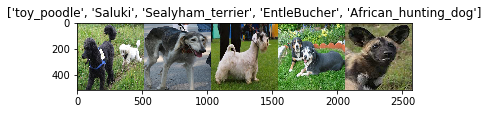

In [17]:
# 念のため可視化してみる
import matplotlib.pyplot as plt
import torchvision

def imshow(inputs, title=None):
    inputs = inputs.numpy() # Tensor型からnumpy型に変換
    inputs = inputs.transpose((1, 2, 0)) # [ch, h, w] -> [h, w, ch]に並び替え
    inputs = 0.5*inputs + 0.5 # [-1, 1] -> [0, 1]に De-Normalization
    plt.imshow(inputs)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
imgs, dog_names = data['img'], data['name']
img_grid = torchvision.utils.make_grid(imgs) # ひとまとまりの画像を作ってくれる
imshow(img_grid, dog_names)